<a href="https://colab.research.google.com/github/laljfagela/CCS8_Fagela_Google-Colab/blob/main/Lab_Challenge_4_Model_Evaluation_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FAGELA, Lucci Ania Luisse J.


CC19 2C TThS

In [ ]:
!pip install scikit-learn pandas numpy matplotlib

# Part 1


# Step 1: Understanding Cross-Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import numpy as np

# Step 2: Load the Dataset

In [ ]:
#Load dataset
iris = load_iris()
x,y = iris.data, iris.target

In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**Analysis:**

*What happens when depth is too small?*

If tree depth is too small, it means that the model failedto capture the patterns in the data, potentially leading to poor performance.

*What happens if depth is too large?*

On the other hand, if the tree depth is too large, it leads to overfitting of which it fails to capture underlying patterns in the data and might potentially capture unrelated data and noise. Ultimately, leading to poor performance on both training and test sets.

*How can we determine the optimal depth?*

We can do this by using K-fold-cross-validation in which the training sets are divided into K eually sized subsets. It helps determine the error rate in the testing of data, a higher error rate in the testing indicates overfitting while the opposite indicates underfitting.









# Step 3: Implement Cross-Validation

In [ ]:
model = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold)

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean accuracy: 0.9533333333333335


**Analysis:**

*What does cross-validation do?*

Cross-validation evaluates the performance of the model by splitting the data into multiple subsets. It helps ensure that a model hs the ability to reflect and generalize data.


*Why do we take the mean accuracy?*

It is to provide a more reliable and unbiased estimate of a model's performane. In detail:


*   Reduce Variability - averaging the accuracy smooths out the variations providing a stable estimate of the performance.
*   Generalization Assessment - reflects how well the model generalizes data
*   Avoid overfitting or underfitting - helps detect possibilities of overfitting and underfitting ensuring that the model is not to complex nor too simple.








# Part 2: Detecting Overfitting & Underfitting

In [ ]:
train_scores = []
test_scores = []
depths = range (1,11)

In [ ]:
for depth in depths:
  model = DecisionTreeClassifier(max_depth=depth)
  model.fit(X_train, y_train)

  train_scores.append(accuracy_score(y_train, model.predict(X_train)))
  test_scores.append(accuracy_score(y_test, model.predict(X_test)))

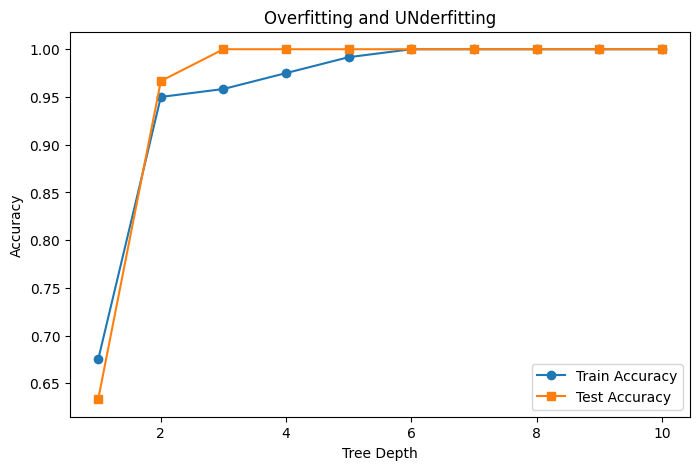

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_scores, label='Test Accuracy', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting and UNderfitting")
plt.show()

# Part 3: Bias-Variance Tradeoff


In [ ]:
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

log_train_acc = accuracy_score(y_train, log_model.predict(X_train))
log_test_acc = accuracy_score(y_test, log_model.predict(X_test))

rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Logistic Regression = Train: {log_train_acc:.3f}, Test: {log_test_acc:.3f}")
print(f"Random Forest = Train: {rf_train_acc:.3f}, Test: {rf_test_acc: .3f}")

Logistic Regression = Train: 0.975, Test: 1.000
Random Forest = Train: 1.000, Test:  1.000


**Analysis**

*Which model has higher training accuracy?*

Random Forest

*Which model generalized better to the test set?*

Random Forest - while both models achieved a 1.000 score on the test, the random forest achieved a perfect score on both the train and test, making it better than Logistic Regression


*How does this relate to the bias-variance tradeoff?*

The tradeoff aids in balancing the model's simplicity and ability to fit the data. Given that the Random Forest was able to achieve a perfect score on both training and test sets, it indicates that it is complex enough to capture the underlying patterns without resulting to overfitting and uderfitting. while the Logistic Regression might potentially have a slightly higher bias since, according to its score, it doesn't fit the training data well.